In [3]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


'tf'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from PIL import Image
import glob
import cv2
train_images=[]
for filename in glob.glob('/content/drive/My Drive/deeplearningicp4/aeroplane/train/*.jpg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (50,50))
    train_images.append([output,0])

In [0]:
from PIL import Image
import glob
import cv2
for filename in glob.glob('/content/drive/My Drive/deeplearningicp4/dogs/train/*.jpg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal,(50,50))
    train_images.append([output,1])

In [0]:
import random
random.shuffle(train_images)

In [0]:
x_train=[]
y_train=[]
for im,label in train_images:
  x_train.append(im)
  y_train.append(label)

In [0]:
x_train=np.array(x_train).reshape(-1,50,50,3)

In [9]:
train_images[0]

[array([[[111, 112,  44],
         [113, 114,  46],
         [113, 114,  46],
         ...,
         [111, 112,  44],
         [111, 112,  46],
         [106, 107,  41]],
 
        [[116, 117,  49],
         [113, 114,  46],
         [113, 114,  46],
         ...,
         [113, 114,  46],
         [112, 113,  47],
         [111, 112,  46]],
 
        [[113, 114,  46],
         [114, 115,  47],
         [116, 118,  48],
         ...,
         [111, 116,  47],
         [111, 112,  44],
         [109, 110,  42]],
 
        ...,
 
        [[102,  99,  95],
         [ 98,  95,  91],
         [119, 115, 110],
         ...,
         [103, 106,  44],
         [100, 105,  44],
         [ 96, 101,  40]],
 
        [[116, 110, 103],
         [112, 110, 107],
         [100,  98,  97],
         ...,
         [101, 106,  45],
         [101, 106,  45],
         [ 98, 103,  42]],
 
        [[105, 100,  94],
         [117, 114, 112],
         [106, 104, 103],
         ...,
         [100, 105,  44],
  

In [10]:
type(x_train)
x_train.shape
x_train[0]

array([[[111, 112,  44],
        [113, 114,  46],
        [113, 114,  46],
        ...,
        [111, 112,  44],
        [111, 112,  46],
        [106, 107,  41]],

       [[116, 117,  49],
        [113, 114,  46],
        [113, 114,  46],
        ...,
        [113, 114,  46],
        [112, 113,  47],
        [111, 112,  46]],

       [[113, 114,  46],
        [114, 115,  47],
        [116, 118,  48],
        ...,
        [111, 116,  47],
        [111, 112,  44],
        [109, 110,  42]],

       ...,

       [[102,  99,  95],
        [ 98,  95,  91],
        [119, 115, 110],
        ...,
        [103, 106,  44],
        [100, 105,  44],
        [ 96, 101,  40]],

       [[116, 110, 103],
        [112, 110, 107],
        [100,  98,  97],
        ...,
        [101, 106,  45],
        [101, 106,  45],
        [ 98, 103,  42]],

       [[105, 100,  94],
        [117, 114, 112],
        [106, 104, 103],
        ...,
        [100, 105,  44],
        [ 99, 102,  46],
        [ 97, 101,  45]]

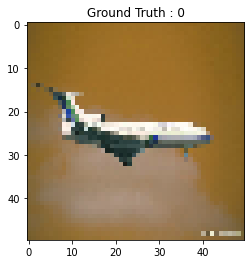

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[50,:,:])
plt.title('Ground Truth : {}'.format(y_train[50]))
plt.show()


In [0]:
test_images=[]
for filename in glob.glob('/content/drive/My Drive/deeplearningicp4/aeroplane/test/*.jpg'): 
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (50,50))
    test_images.append([output,0])

In [0]:
for filename in glob.glob('/content/drive/My Drive/deeplearningicp4/dogs/test/*.jpg'): 
    img_normal = cv2.imread(filename)
    #print(im.shape)
    #print(type(im.shape))
    output = cv2.resize(img_normal, (50,50))
    test_images.append([output,1])

In [0]:
random.shuffle(test_images)

In [0]:
x_test=[]
y_test=[]
for im,label in test_images:
  x_test.append(im)
  y_test.append(label)

In [0]:
x_test=np.array(x_test).reshape(-1,50,50,3)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [19]:
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(x_train.shape[1:]), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [0]:
epochs = 20
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=128)


Train on 400 samples, validate on 371 samples
Epoch 1/20
400/400 [==============================] - 8s 20ms/step - loss: 14.4405 - accuracy: 0.4925 - val_loss: 0.6900 - val_accuracy: 0.5067
Epoch 2/20
400/400 [==============================] - 1s 1ms/step - loss: 0.6210 - accuracy: 0.5725 - val_loss: 0.6920 - val_accuracy: 0.5472
Epoch 3/20
400/400 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.5600 - val_loss: 0.6952 - val_accuracy: 0.3881
Epoch 4/20
400/400 [==============================] - 1s 1ms/step - loss: 0.4738 - accuracy: 0.7225 - val_loss: 1.6056 - val_accuracy: 0.4636
Epoch 5/20
400/400 [==============================] - 1s 1ms/step - loss: 0.4050 - accuracy: 0.8000 - val_loss: 1.4577 - val_accuracy: 0.4663
Epoch 6/20
400/400 [==============================] - 1s 1ms/step - loss: 0.3181 - accuracy: 0.8725 - val_loss: 1.9780 - val_accuracy: 0.4582
Epoch 7/20
400/400 [==============================] - 1s 1ms/step - loss: 0.2911 - accuracy: 0.9000

In [0]:
import pickle
with open("/content/drive/My Drive/deeplearningicp4/jaswanth.pk2",'wb') as file:
      pickle.dump(model,file)

In [0]:
x=model.predict_classes(x_train[[50],:])

In [24]:
print(x[0])

0
